## Set up

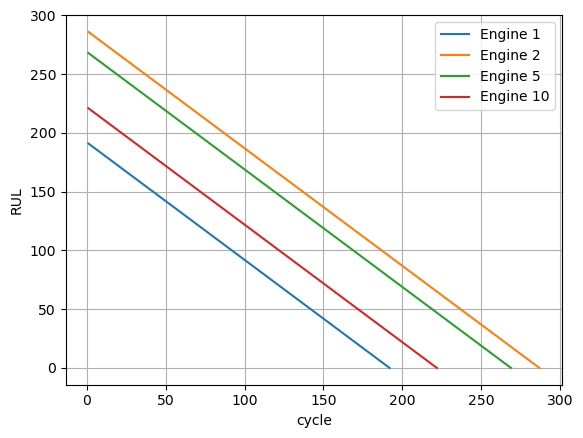

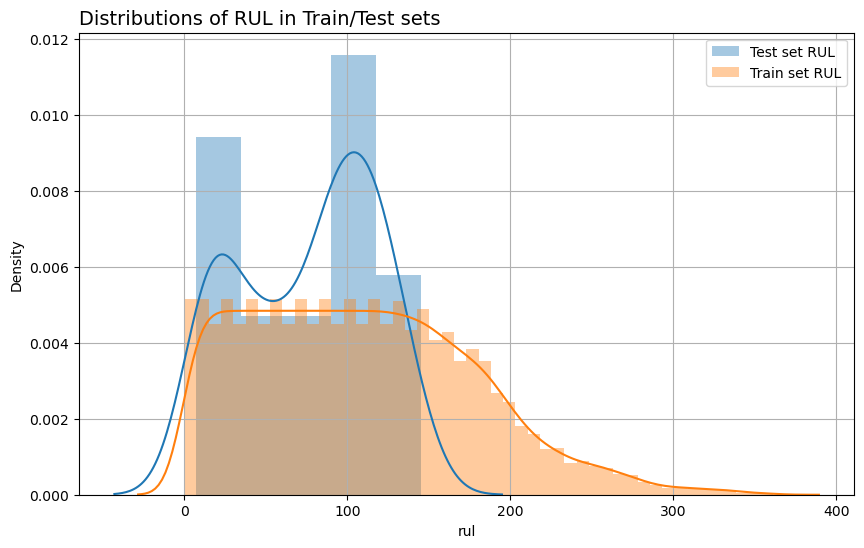

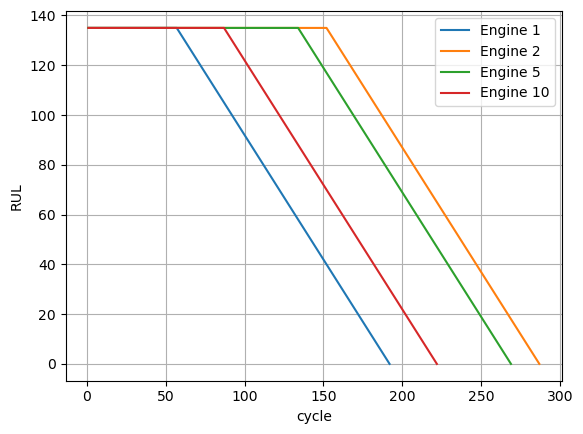

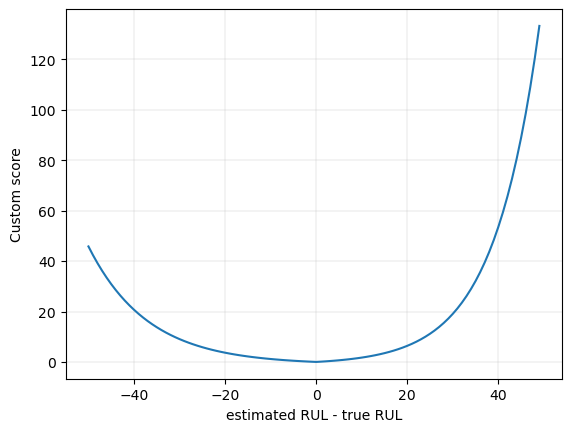

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


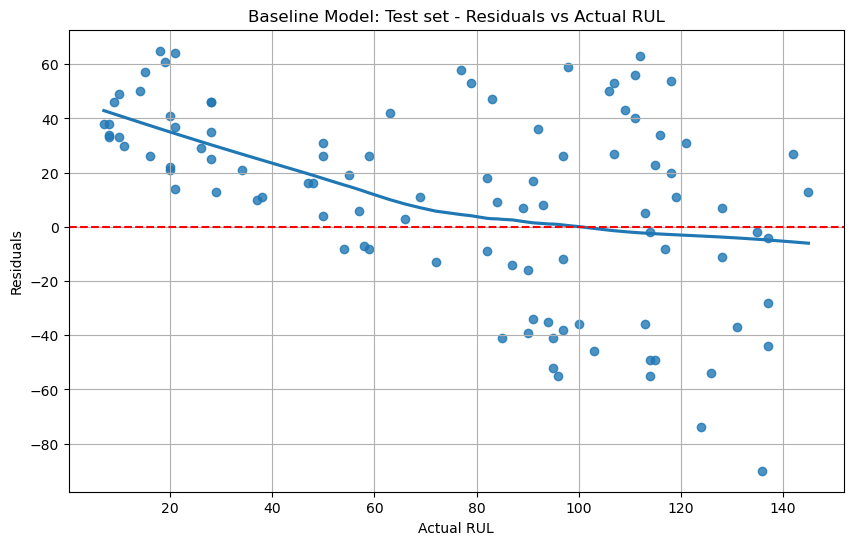

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import PoissonRegressor, LinearRegression
from sklearn.compose import make_column_selector
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import cross_validate

from utils_MyProject import read_dataset



%matplotlib inline
%load_ext autoreload
%autoreload 2

## Data Processing

We apply Cusum and autoencoder to detect the anomalies in both the training and test data.
On the other side, these data are scaled by engine, the constant features are removed, the rolling stats are applied and finally all the sensor features are normalized. 

In [2]:
from dataproc_evaluation import evaluate
from utils_MyProject import calculate_RUL
from utils_MyProject import calculate_RUL, read_dataset
from dataproc_evaluation import evaluate
from utils_MyProject import split_train_validate, get_scores_model, get_last_cycle_df
from data_processing import *
from autoencoder import Autoencoder
from cusum import cusum
from run_cusum_autoencoder import detect_anomalies, get_clipped_sequences, plot_engine_degradation_from_df, plot_anomaly_results, set_pre_anomaly_rul

In [3]:
dataset_name = 'FD001'
train1, test1, test_rul1 = read_dataset(dataset_name)
train1a, test1a = train1.copy(), test1.copy()
train1b, test1b = train1.copy(), test1.copy() 

dataset_name = 'FD003'
train3, test3, test_rul3 = read_dataset(dataset_name)
train3a, test3a = train3.copy(), test3.copy()
train3b, test3b = train3.copy(), test3.copy()

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 277ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
3/3 ━━━━━━━

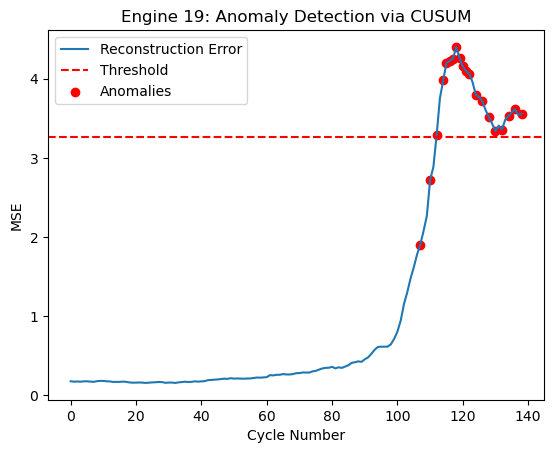

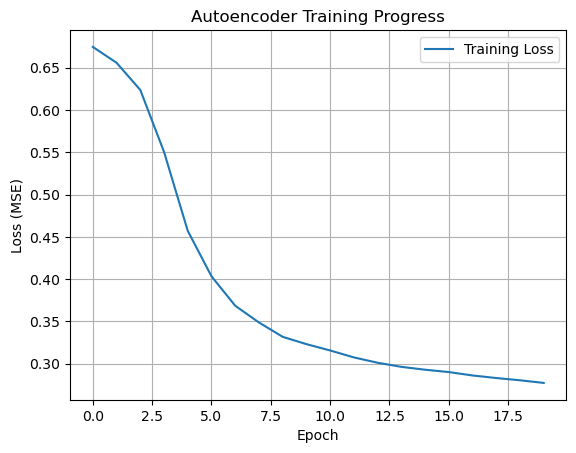

11


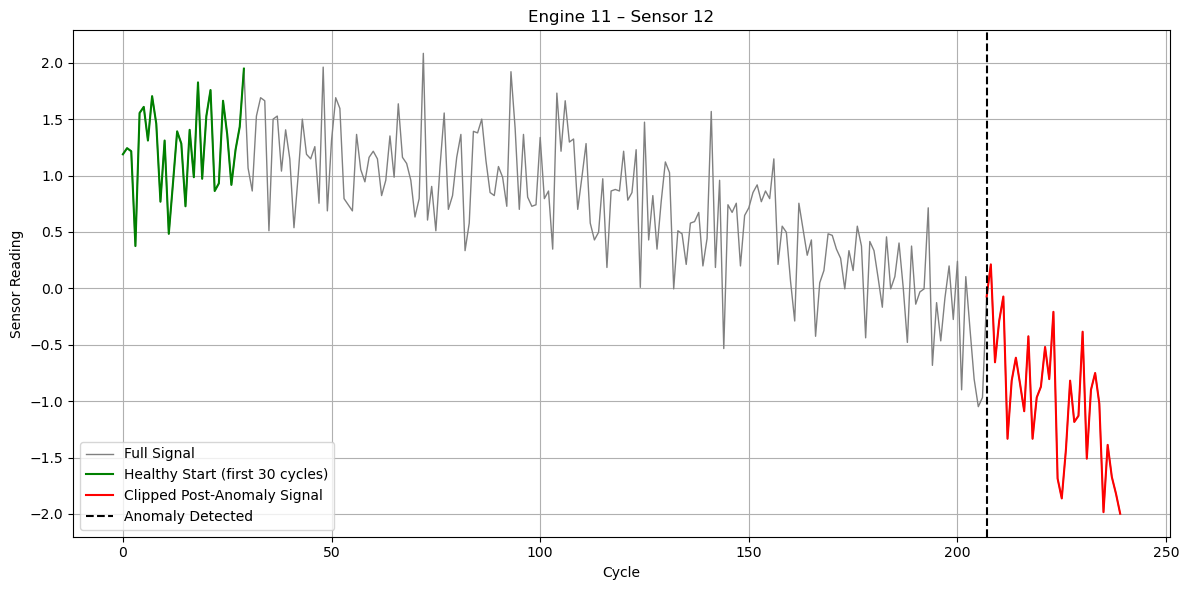

In [4]:
"""
1. Obtain the anomaly in the time series using cusum and autoencoder
For training data
"""
# Normalize

train1a_forCusum = train1a.copy()
get_ftr_names = make_column_selector(pattern='sensor')
features = get_ftr_names(train1a_forCusum)
scaler = StandardScaler()                                                                            #Z score normalization
scaler.fit(train1a_forCusum[features])                                                                             #Learn mean & standard deviations

train1a_forCusum[features] = scaler.transform(train1a_forCusum[features])

# Apply cusum and autoencoder
anomalies, health_parameters, history = detect_anomalies(train1a_forCusum, healthy_cycles=20)

healthy_mean = health_parameters['healthy_mean']
threshold = health_parameters['threshold']

plot_anomaly_results(anomalies, 19, healthy_mean, threshold, history)
plot_engine_degradation_from_df(train1a_forCusum, anomalies, 10, 11)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3/3 ━━━━━━━

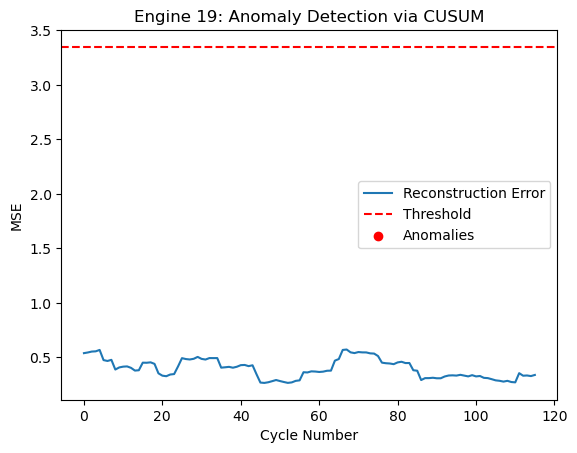

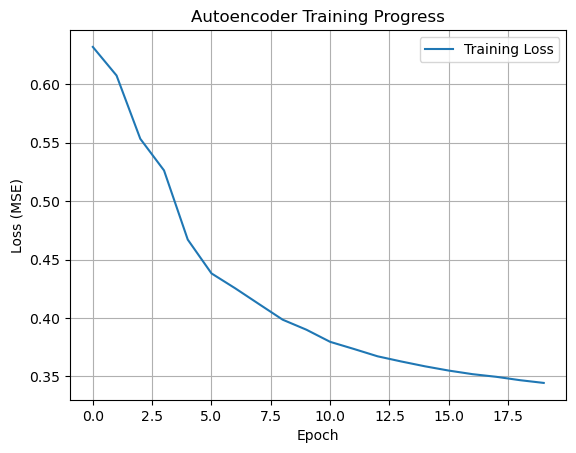

11


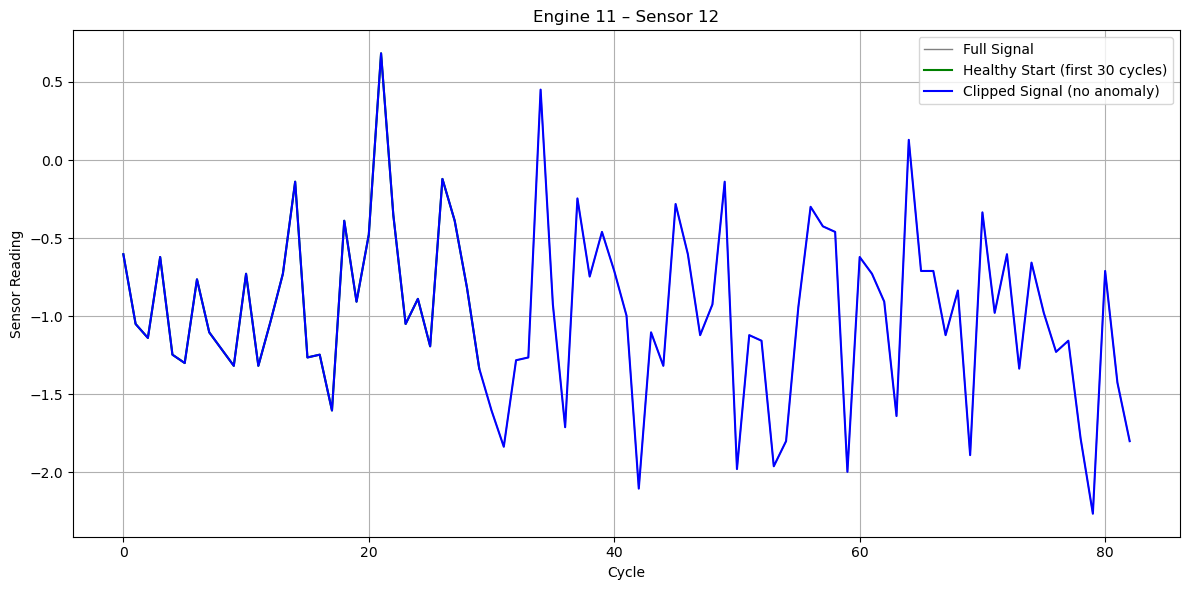

In [5]:
"""
1. Obtain the anomaly in the time series using cusum and autoencoder
For training data
"""
# Normalize

test1a_forCusum = test1a.copy()
get_ftr_names = make_column_selector(pattern='sensor')
features = get_ftr_names(test1a_forCusum)
scaler = StandardScaler()                                                                            #Z score normalization
scaler.fit(test1a_forCusum[features])                                                                             #Learn mean & standard deviations

test1a_forCusum[features] = scaler.transform(test1a_forCusum[features])

# Apply cusum and autoencoder
anomalies_test, health_parameters_test, history_test = detect_anomalies(test1a_forCusum, healthy_cycles=20)

healthy_mean_test = health_parameters_test['healthy_mean']
threshold_test = health_parameters_test['threshold']

plot_anomaly_results(anomalies_test, 19, healthy_mean_test, threshold_test, history_test)
plot_engine_degradation_from_df(test1a_forCusum, anomalies_test, 10, 11)

In [6]:
"""
2. Process the data and clip it to keep only the post anomaly part
For training data
"""

# drop constant columns
train1a = remove_low_variance_features(train1a)

# Scale the time series by engine
train1a = scale_by_engine(train1a)

# Rolling statistics
train1a = rolling_stat(train1a)

# Normalize
get_ftr_names = make_column_selector(pattern='sensor')
features = get_ftr_names(train1a)
scaler_train1 = StandardScaler()                                                                            #Z score normalization
scaler_train1.fit(train1a[features])                                                                             #Learn mean & standard deviations
train1a[features] = scaler_train1.transform(train1a[features]) 

Removed low variance features: ['op_setting_3', 'sensor_1', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19', 'sensor_5']


In [7]:
"""
2. Process the data and clip it to keep only the post anomaly part
For test data
"""

# drop constant columns
features_to_drop = ['op_setting_3', 'sensor_1', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19', 'sensor_5']
test1a = test1a.drop(features_to_drop, axis=1)

# Scale the time series by engine
test1a = scale_by_engine(test1a)

# Rolling statistics
test1a = rolling_stat(test1a)

# Normalize
get_ftr_names = make_column_selector(pattern='sensor')
features = get_ftr_names(test1a)
# scaler = StandardScaler()                                                                            #Z score normalization
# scaler.fit(test1a[features])                                                                             #Learn mean & standard deviations
test1a[features] = scaler_train1.transform(test1a[features]) 

test1a.head(5)

,unit,time_cycles,op_setting_1,op_setting_2,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,...,rolling sensor_8,rolling sensor_9,rolling sensor_11,rolling sensor_12,rolling sensor_13,rolling sensor_14,rolling sensor_15,rolling sensor_17,rolling sensor_20,rolling sensor_21
0,1,1,0.0023,0.0003,0.861077,-0.668172,-1.174458,-0.232539,0.440996,-0.564255,...,-0.619877,-0.474281,-1.350460,0.470327,-1.128084,-0.713452,-0.989076,-0.538936,0.037589,0.690753
1,1,2,-0.0027,-0.0003,-1.869207,-0.136410,-1.508499,-0.232539,1.597834,-1.047114,...,-0.899168,-0.365458,-0.669727,0.835922,-0.852893,-0.289606,-1.410382,-0.125423,0.602776,0.797820
2,1,3,0.0003,0.0001,-0.306067,-0.390511,-0.799709,-0.232539,0.696718,-0.403301,...,-0.744006,-0.285826,-0.442817,0.852540,-0.944623,-0.339512,-0.831156,0.012414,0.932468,0.932098
3,1,4,0.0042,0.0000,-0.347751,-0.865059,-0.191491,-0.232539,0.648009,-0.725208,...,-0.759523,-0.395417,-0.578963,0.615734,-0.898758,-0.322291,-0.984846,-0.332180,0.956017,0.872353
4,1,5,0.0014,0.0000,-0.201858,-0.348442,-0.730267,-0.232539,0.757604,-1.047114,...,-0.843310,-0.468751,-0.633422,0.729567,-0.944623,-0.352445,-0.999904,-0.704341,0.956017,0.929495


In [8]:
# Clip the post-anomaly data 
train1a_PostAnomaly, X_train1a_PostAnomaly, train1a_PreAnomaly,_ = get_clipped_sequences(train1a, anomalies)  # type of the output: df for the first one and np array for the second
train1a_PostAnomaly.head(3)




Engine 1.0: Clipped at cycle 154
Engine 2.0: Clipped at cycle 251
Engine 3.0: Clipped at cycle 148
Engine 4.0: Clipped at cycle 155
Engine 5.0: Clipped at cycle 229
Engine 6.0: Clipped at cycle 129
Engine 7.0: Clipped at cycle 219
Engine 8.0: Clipped at cycle 105
Engine 9.0: Clipped at cycle 163
Engine 10.0: Clipped at cycle 191
Engine 11.0: Clipped at cycle 207
Engine 12.0: Clipped at cycle 121
Engine 13.0: Clipped at cycle 130
Engine 14.0: Clipped at cycle 140
Engine 15.0: Clipped at cycle 174
Engine 16.0: Clipped at cycle 148
Engine 17.0: Clipped at cycle 234
Engine 18.0: Clipped at cycle 160
Engine 19.0: Clipped at cycle 107
Engine 20.0: Clipped at cycle 183
Engine 21.0: Clipped at cycle 163
Engine 22.0: Clipped at cycle 138
Engine 23.0: Clipped at cycle 125
Engine 24.0: Clipped at cycle 119
Engine 25.0: Clipped at cycle 186
Engine 26.0: Clipped at cycle 160
Engine 27.0: Clipped at cycle 125
Engine 28.0: Clipped at cycle 140
Engine 29.0: Clipped at cycle 127
Engine 30.0: Clipped at

,unit,time_cycles,op_setting_1,op_setting_2,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,...,rolling sensor_8,rolling sensor_9,rolling sensor_11,rolling sensor_12,rolling sensor_13,rolling sensor_14,rolling sensor_15,rolling sensor_17,rolling sensor_20,rolling sensor_21
0,1.0,155.0,-0.0033,0.0002,0.640153,-0.199346,0.902704,-0.232539,-0.715841,1.125754,...,1.186204,-0.525594,0.973107,-1.405844,1.862326,-0.854915,1.034550,1.032412,-1.015070,-1.046223
1,1.0,156.0,-0.0020,0.0003,1.077832,-1.005404,1.661780,-0.232539,-0.289638,2.735287,...,1.633069,-0.565641,0.973107,-1.468993,1.642173,-0.839612,0.912727,1.197817,-0.718348,-0.924604
2,1.0,157.0,-0.0018,0.0002,-0.672884,1.086307,0.612962,-0.232539,-1.409944,0.803848,...,1.484114,-0.471209,0.973107,-1.286195,1.568789,-0.766471,0.747588,0.701602,-0.859644,-0.928153


## RUL prediction
As mentioned in the report, two different models are trained: one with the full processed data and one with only the processed Post-anomaly data. Then, these models are used on the test data in the following ways:
- The model trained with the full data is used to predict the RUL of the pre-anomaly test data
- The model trained with the Post-anomaly data is used to predict the RUL of the post-anomaly data

Finally we combined the prediction of both models to compute the performance metrics.

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import PoissonRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
# from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from target_metrics_baseline import rul_score
import numpy as np
import pandas as pd

RUL_THRESHOLD = 135

from sklearn.ensemble import GradientBoostingRegressor

def get_model(model_name='poisson'):
    """
    Return a sklearn Pipeline with StandardScaler + chosen regression model
    """
    if model_name == 'poisson':
        model = PoissonRegressor()
    elif model_name == 'gbm':  
        model = GradientBoostingRegressor(
            n_estimators=200,
            max_depth=5,
            learning_rate=0.05,
            subsample=0.8,
            random_state=42
        )
    elif model_name == 'random_forest':
        model = RandomForestRegressor(n_estimators=100, random_state=42)
    elif model_name == 'svr':
        model = SVR(kernel='rbf', C=10, epsilon=0.1)
    elif model_name == 'mlp':
        model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
    else:
        raise ValueError(f"Model {model_name} not recognized.")
    
    pipeline = Pipeline([
        ('scale', StandardScaler()),
        ('model', model)
    ])
    return pipeline



### full / post = GBM / Poisson 

In [10]:


# Choose models to try here:
full_model_name = 'gbm'          # change to 'poisson', 'random_forest', 'svr', 'mlp' etc.
post_anomaly_model_name = 'gbm'      # you can choose different models for full and post anomaly

# --- Train model on FULL data ---
model_full = get_model(full_model_name)
rul_full = calculate_RUL(train1a, upper_threshold=RUL_THRESHOLD)
model_full.fit(train1a[get_ftr_names(train1a)], rul_full)

# --- Train model on POST-anomaly data ---
model_post_anomaly = get_model(post_anomaly_model_name)
rul_post = calculate_RUL(train1a_PostAnomaly, upper_threshold=RUL_THRESHOLD)
model_post_anomaly.fit(train1a_PostAnomaly[get_ftr_names(train1a_PostAnomaly)], rul_post)

# --- Inference on test set ---
results = []
is_post_anomaly = {}

for unit in test1a['unit'].unique():
    unit_data = test1a[test1a['unit'] == unit]
    last_cycle = unit_data['time_cycles'].max()
    last_cycle_data = unit_data[unit_data['time_cycles'] == last_cycle]
    X_last = last_cycle_data[get_ftr_names(last_cycle_data)].values

    anomaly_info = anomalies_test.get(unit, {})
    anomaly_pos = anomaly_info.get('pos', [])
    is_post = len(anomaly_pos) > 0 and last_cycle >= anomaly_pos[0]

    # Choose the model
    if is_post:
        y_pred = model_post_anomaly.predict(X_last)
        model_used = 'post_anomaly'
    else:
        y_pred = model_full.predict(X_last)
        model_used = 'full'
    
    is_post_anomaly[unit] = is_post
    results.append({
        'unit': unit,
        'true_rul': test_rul1[unit - 1],  # index shift: unit 1-based, test_rul1 0-based
        'predicted_rul': y_pred[0],
        'model_used': model_used,
        'is_post_anomaly': is_post
    })

results_df = pd.DataFrame(results)

# --- Global Metrics ---
true_rul_all = results_df['true_rul']
predicted_rul_all = results_df['predicted_rul']
mse = mean_squared_error(true_rul_all, predicted_rul_all)
rmse_all = np.sqrt(mse)
mae_all = mean_absolute_error(true_rul_all, predicted_rul_all)
mape_all = np.mean(np.abs((true_rul_all - predicted_rul_all) / (true_rul_all + 1e-8)))
custom_score_all = rul_score(true_rul_all, predicted_rul_all)

print(f"\n=== Overall Performance ===")
print(f"RMSE: {rmse_all:.4f}")
print(f"MAE: {mae_all:.4f}")
print(f"MAPE: {mape_all:.4f}")
print(f"Custom Score: {custom_score_all:.4f}")
#print(f"Custom RUL Score: {rul_score(true_rul_all, predicted_rul_all):.4f}")  # Uncomment if rul_score defined

# --- Per-model Metrics ---
for model_type in ['full', 'post_anomaly']:
    model_mask = results_df['model_used'] == model_type
    if model_mask.any():
        true_rul = results_df.loc[model_mask, 'true_rul']
        pred_rul = results_df.loc[model_mask, 'predicted_rul']
        mse = mean_squared_error(true_rul, pred_rul)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(true_rul, pred_rul)
        mape = np.mean(np.abs((true_rul - pred_rul) / (true_rul + 1e-8)))
        score = rul_score(true_rul, pred_rul)

        print(f"\n=== {model_type.capitalize()} Model ===")
        print(f"Units: {model_mask.sum()}")
        print(f"RMSE: {rmse:.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"MAPE: {mape:.4f}")
        print(f"Custom RUL Score: {score:.4f}")
    else:
        print(f"\nNo predictions made by {model_type} model.")


=== Overall Performance ===
RMSE: 16.2451
MAE: 12.2050
MAPE: 0.2060
Custom Score: 445.2707

=== Full Model ===
Units: 77
RMSE: 17.3227
MAE: 13.4841
MAPE: 0.1519
Custom RUL Score: 396.9867

=== Post_anomaly Model ===
Units: 23
RMSE: 11.9502
MAE: 7.9227
MAPE: 0.3872
Custom RUL Score: 48.2840


### full / post: Poisson / MLP

In [11]:
# Choose models to try here:
full_model_name = 'poisson'          # change to 'poisson', 'random_forest', 'svr', 'mlp' etc.
post_anomaly_model_name = 'mlp'      # you can choose different models for full and post anomaly

# --- Train model on FULL data ---
model_full = get_model(full_model_name)
rul_full = calculate_RUL(train1a, upper_threshold=RUL_THRESHOLD)
model_full.fit(train1a[get_ftr_names(train1a)], rul_full)

# --- Train model on POST-anomaly data ---
model_post_anomaly = get_model(post_anomaly_model_name)
rul_post = calculate_RUL(train1a_PostAnomaly, upper_threshold=RUL_THRESHOLD)
model_post_anomaly.fit(train1a_PostAnomaly[get_ftr_names(train1a_PostAnomaly)], rul_post)

# --- Inference on test set ---
results = []
is_post_anomaly = {}

for unit in test1a['unit'].unique():
    unit_data = test1a[test1a['unit'] == unit]
    last_cycle = unit_data['time_cycles'].max()
    last_cycle_data = unit_data[unit_data['time_cycles'] == last_cycle]
    X_last = last_cycle_data[get_ftr_names(last_cycle_data)].values

    anomaly_info = anomalies_test.get(unit, {})
    anomaly_pos = anomaly_info.get('pos', [])
    is_post = len(anomaly_pos) > 0 and last_cycle >= anomaly_pos[0]

    # Choose the model
    if is_post:
        y_pred = model_post_anomaly.predict(X_last)
        model_used = 'post_anomaly'
    else:
        y_pred = model_full.predict(X_last)
        model_used = 'full'
    
    is_post_anomaly[unit] = is_post
    results.append({
        'unit': unit,
        'true_rul': test_rul1[unit - 1],  # index shift: unit 1-based, test_rul1 0-based
        'predicted_rul': y_pred[0],
        'model_used': model_used,
        'is_post_anomaly': is_post
    })

results_df = pd.DataFrame(results)


# --- Global Metrics ---
true_rul_all = results_df['true_rul']
predicted_rul_all = results_df['predicted_rul']
mse = mean_squared_error(true_rul_all, predicted_rul_all)
rmse_all = np.sqrt(mse)
mae_all = mean_absolute_error(true_rul_all, predicted_rul_all)
mape_all = np.mean(np.abs((true_rul_all - predicted_rul_all) / (true_rul_all + 1e-8)))
custom_score_all = rul_score(true_rul_all, predicted_rul_all)

print(f"\n=== Overall Performance ===")
print(f"RMSE: {rmse_all:.4f}")
print(f"MAE: {mae_all:.4f}")
print(f"MAPE: {mape_all:.4f}")
print(f"Custom Score: {custom_score_all:.4f}")
#print(f"Custom RUL Score: {rul_score(true_rul_all, predicted_rul_all):.4f}")  # Uncomment if rul_score defined

# --- Per-model Metrics ---
for model_type in ['full', 'post_anomaly']:
    model_mask = results_df['model_used'] == model_type
    if model_mask.any():
        true_rul = results_df.loc[model_mask, 'true_rul']
        pred_rul = results_df.loc[model_mask, 'predicted_rul']
        mse = mean_squared_error(true_rul, pred_rul)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(true_rul, pred_rul)
        mape = np.mean(np.abs((true_rul - pred_rul) / (true_rul + 1e-8)))
        score = rul_score(true_rul, pred_rul)

        print(f"\n=== {model_type.capitalize()} Model ===")
        print(f"Units: {model_mask.sum()}")
        print(f"RMSE: {rmse:.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"MAPE: {mape:.4f}")
        print(f"Custom RUL Score: {score:.4f}")
    else:
        print(f"\nNo predictions made by {model_type} model.")


=== Overall Performance ===
RMSE: 19.0545
MAE: 14.3634
MAPE: 0.2630
Custom Score: 791.1799

=== Full Model ===
Units: 77
RMSE: 20.4990
MAE: 15.8564
MAPE: 0.1797
Custom RUL Score: 732.2041

=== Post_anomaly Model ===
Units: 23
RMSE: 13.1072
MAE: 9.3651
MAPE: 0.5419
Custom RUL Score: 58.9758


### full / post: Poisson / SVD

In [12]:
# Choose models to try here:
full_model_name = 'gbm'          # change to 'poisson', 'random_forest', 'svr', 'mlp' etc.
post_anomaly_model_name = 'svr'      # you can choose different models for full and post anomaly

# --- Train model on FULL data ---
model_full = get_model(full_model_name)
rul_full = calculate_RUL(train1a, upper_threshold=RUL_THRESHOLD)
model_full.fit(train1a[get_ftr_names(train1a)], rul_full)

# --- Train model on POST-anomaly data ---
model_post_anomaly = get_model(post_anomaly_model_name)
rul_post = calculate_RUL(train1a_PostAnomaly, upper_threshold=RUL_THRESHOLD)
model_post_anomaly.fit(train1a_PostAnomaly[get_ftr_names(train1a_PostAnomaly)], rul_post)

# --- Inference on test set ---
results = []
is_post_anomaly = {}

for unit in test1a['unit'].unique():
    unit_data = test1a[test1a['unit'] == unit]
    last_cycle = unit_data['time_cycles'].max()
    last_cycle_data = unit_data[unit_data['time_cycles'] == last_cycle]
    X_last = last_cycle_data[get_ftr_names(last_cycle_data)].values

    anomaly_info = anomalies_test.get(unit, {})
    anomaly_pos = anomaly_info.get('pos', [])
    is_post = len(anomaly_pos) > 0 and last_cycle >= anomaly_pos[0]

    # Choose the model
    if is_post:
        y_pred = model_post_anomaly.predict(X_last)
        model_used = 'post_anomaly'
    else:
        y_pred = model_full.predict(X_last)
        model_used = 'full'
    
    is_post_anomaly[unit] = is_post
    results.append({
        'unit': unit,
        'true_rul': test_rul1[unit - 1],  # index shift: unit 1-based, test_rul1 0-based
        'predicted_rul': y_pred[0],
        'model_used': model_used,
        'is_post_anomaly': is_post
    })

results_df = pd.DataFrame(results)


# --- Global Metrics ---
true_rul_all = results_df['true_rul']
predicted_rul_all = results_df['predicted_rul']
mse = mean_squared_error(true_rul_all, predicted_rul_all)
rmse_all = np.sqrt(mse)
mae_all = mean_absolute_error(true_rul_all, predicted_rul_all)
mape_all = np.mean(np.abs((true_rul_all - predicted_rul_all) / (true_rul_all + 1e-8)))
custom_score_all = rul_score(true_rul_all, predicted_rul_all)

print(f"\n=== Overall Performance ===")
print(f"RMSE: {rmse_all:.4f}")
print(f"MAE: {mae_all:.4f}")
print(f"MAPE: {mape_all:.4f}")
print(f"Custom Score: {custom_score_all:.4f}")
#print(f"Custom RUL Score: {rul_score(true_rul_all, predicted_rul_all):.4f}")  # Uncomment if rul_score defined

# --- Per-model Metrics ---
for model_type in ['full', 'post_anomaly']:
    model_mask = results_df['model_used'] == model_type
    if model_mask.any():
        true_rul = results_df.loc[model_mask, 'true_rul']
        pred_rul = results_df.loc[model_mask, 'predicted_rul']
        mse = mean_squared_error(true_rul, pred_rul)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(true_rul, pred_rul)
        mape = np.mean(np.abs((true_rul - pred_rul) / (true_rul + 1e-8)))
        score = rul_score(true_rul, pred_rul)

        print(f"\n=== {model_type.capitalize()} Model ===")
        print(f"Units: {model_mask.sum()}")
        print(f"RMSE: {rmse:.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"MAPE: {mape:.4f}")
        print(f"Custom RUL Score: {score:.4f}")
    else:
        print(f"\nNo predictions made by {model_type} model.")


=== Overall Performance ===
RMSE: 16.2701
MAE: 12.2190
MAPE: 0.2025
Custom Score: 446.9299

=== Full Model ===
Units: 77
RMSE: 17.3227
MAE: 13.4841
MAPE: 0.1519
Custom RUL Score: 396.9867

=== Post_anomaly Model ===
Units: 23
RMSE: 12.0969
MAE: 7.9837
MAPE: 0.3718
Custom RUL Score: 49.9432


### full / post: GBM / LSTM

To train a LSTM model, we need to first create input sequences. This is why the code below is slightly different of what is done above 

#### Data processing for LSTM

In [48]:
dataset_name = 'FD001'
train1, test1, test_rul1 = read_dataset(dataset_name)
train1a, test1a = train1.copy(), test1.copy()
train1b, test1b = train1.copy(), test1.copy() 

In [49]:
# Keep only the post anomaly cycles from the pre processed data
train1a_PostAnomaly_NotProcessed, X_train1a_PostAnomaly, train1a_PreAnomaly,_ = get_clipped_sequences(train1a, anomalies)  # type of the output: df for the first one and np array for the second

train1a_full = train1a.copy()

train1a_PostAnomaly_NotProcessed.head(5)

Engine 1: Clipped at cycle 154
Engine 2: Clipped at cycle 251
Engine 3: Clipped at cycle 148
Engine 4: Clipped at cycle 155
Engine 5: Clipped at cycle 229
Engine 6: Clipped at cycle 129
Engine 7: Clipped at cycle 219
Engine 8: Clipped at cycle 105
Engine 9: Clipped at cycle 163
Engine 10: Clipped at cycle 191
Engine 11: Clipped at cycle 207
Engine 12: Clipped at cycle 121
Engine 13: Clipped at cycle 130
Engine 14: Clipped at cycle 140
Engine 15: Clipped at cycle 174
Engine 16: Clipped at cycle 148
Engine 17: Clipped at cycle 234
Engine 18: Clipped at cycle 160
Engine 19: Clipped at cycle 107
Engine 20: Clipped at cycle 183
Engine 21: Clipped at cycle 163
Engine 22: Clipped at cycle 138
Engine 23: Clipped at cycle 125
Engine 24: Clipped at cycle 119
Engine 25: Clipped at cycle 186
Engine 26: Clipped at cycle 160
Engine 27: Clipped at cycle 125
Engine 28: Clipped at cycle 140
Engine 29: Clipped at cycle 127
Engine 30: Clipped at cycle 164
Engine 31: Clipped at cycle 196
Engine 32: Clippe

,unit,time_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,155,-0.0033,0.0002,100.0,518.67,642.83,1590.40,1414.89,14.62,...,521.23,2388.17,8120.41,8.4729,0.03,394,2388,100.0,38.68,23.2749
1,1,156,-0.0020,0.0003,100.0,518.67,643.04,1585.61,1421.23,14.62,...,520.75,2388.16,8128.48,8.4432,0.03,395,2388,100.0,38.77,23.2791
2,1,157,-0.0018,0.0002,100.0,518.67,642.20,1598.04,1412.47,14.62,...,520.94,2388.17,8125.07,8.4328,0.03,392,2388,100.0,38.67,23.2354
3,1,158,-0.0023,0.0001,100.0,518.67,642.88,1596.82,1410.09,14.62,...,520.88,2388.22,8126.33,8.4368,0.03,394,2388,100.0,38.75,23.2894
4,1,159,-0.0006,0.0001,100.0,518.67,642.89,1589.54,1420.37,14.62,...,520.65,2388.23,8127.61,8.4403,0.03,394,2388,100.0,38.76,23.2530


In [50]:
# data processing for full data

# drop constant columns
train1a_full = remove_low_variance_features(train1a_full)

# Scale the time series by engine
train1a_full = scale_by_engine(train1a_full)

# Rolling statistics
train1a_full = rolling_stat(train1a_full)

# Normalize
get_ftr_names = make_column_selector(pattern='sensor')
features = get_ftr_names(train1a_full)
scaler_train1 = StandardScaler()                                                                            #Z score normalization
scaler_train1.fit(train1a_full[features])                                                                             #Learn mean & standard deviations
train1a_full[features] = scaler_train1.transform(train1a_full[features])  

Removed low variance features: ['op_setting_3', 'sensor_1', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19', 'sensor_5']


In [51]:
# Data processing for post_anomaly data
from data_processing import create_health_index_features

# drop the same variables as train_full
features_to_drop = ['op_setting_3', 'sensor_1', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19', 'sensor_5']
train1a_PostAnomaly = train1a_PostAnomaly_NotProcessed.drop(features_to_drop, axis=1)

# Scale the time series by engine
train1a_PostAnomaly = scale_by_engine(train1a_PostAnomaly)

# Rolling statistics
train1a_PostAnomaly = rolling_stat(train1a_PostAnomaly)
train1a_PostAnomaly.head(3)
# Normalize
get_ftr_names = make_column_selector(pattern='sensor')
features = get_ftr_names(train1a_PostAnomaly)                                                                       #Learn mean & standard deviations
train1a_PostAnomaly[features] = scaler_train1.transform(train1a_PostAnomaly[features])  




In [52]:
# data processing for test data

# drop constant columns
test1a = remove_low_variance_features(test1a)

# Scale the time series by engine
test1a = scale_by_engine(test1a)

# Rolling statistics
test1a = rolling_stat(test1a)

# Normalize
get_ftr_names = make_column_selector(pattern='sensor')
features = get_ftr_names(test1a)
scaler_train1 = StandardScaler()                                                                            #Z score normalization
scaler_train1.fit(train1a_full[features])                                                                             #Learn mean & standard deviations
test1a[features] = scaler_train1.transform(test1a[features])  

Removed low variance features: ['op_setting_3', 'sensor_1', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19', 'sensor_5']


#### Train and test models

In [64]:
from create_sequences import create_sequences, create_test_sequences
from lstm import train_lstm_model

# Choose models to try here:
full_model_name = 'gbm'          # change to 'poisson', 'random_forest', 'svr', 'mlp' etc.
post_anomaly_model_name = 'LSTM'      # you can choose different models for full and post anomaly

# --- Train model on FULL data ---
# model_full = get_model(full_model_name)
model_full = Pipeline([
        ('scale', StandardScaler()),
        ('model', PoissonRegressor())
    ])
rul_full = calculate_RUL(train1a_full, upper_threshold=RUL_THRESHOLD)
model_full.fit(train1a_full[get_ftr_names(train1a_full)], rul_full)

# print(f"input shape expected by model_full: {model_full.input_shape}")

# --- Train model on POST-anomaly data ---
# model_post_anomaly = get_model(post_anomaly_model_name)
# create sequences or slinding windows

seq_length = 20
X_seq_PostAnomaly, Y_seq_PostAnomaly, groups_PostAnomaly  = create_sequences(train1a_PostAnomaly, sequence_length= seq_length)
# rul_post = calculate_RUL(train1a_PostAnomaly, upper_threshold=RUL_THRESHOLD)

seq_test1a, engine_ids = create_test_sequences(test1a, sequence_length=seq_length)
# model_post_anomaly.fit(train1a_PostAnomaly[get_ftr_names(train1a_PostAnomaly)], rul_post)
model_post_anomaly, history = train_lstm_model(X_seq_PostAnomaly, 
                                       Y_seq_PostAnomaly, 
                                       groups_PostAnomaly, 
                                       architecture='PIML paper light',  
                                       test_size=0.2, epochs=50)

model_post_anomaly.save('lstm3_PostAnomaly.keras')  # Recommended format (Keras .keras)

Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 254.2507 - mae: 12.5673 - root_mean_squared_error: 15.9395 - learning_rate: 0.0010
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 197.2511 - mae: 10.7158 - root_mean_squared_error: 14.0415 - learning_rate: 0.0010
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 143.7049 - mae: 8.4400 - root_mean_squared_error: 11.9804 - learning_rate: 0.0010
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 98.7732 - mae: 6.7739 - root_mean_squared_error: 9.9288 - learning_rate: 0.0010
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 75.9010 - mae: 5.8929 - root_mean_squared_error: 8.6958 - learning_rate: 0.0010
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 87.8785 - mae: 6.1961 - root_mean_squared_error: 9.3484 - learning_rate: 0.0010
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 72.8725 - mae: 5.6233 - root_mean_squared_error: 8.5333 - learning_rate: 0.0010
Epoch 8/50
68/68 ━━━━━━━━━

In [67]:
from tensorflow import keras

# load the saved model
model_post_anomaly = keras.models.load_model('lstm3_PostAnomaly.keras')

print(f"seq_test shape: {seq_test1a.shape}")
print(model_post_anomaly.input_shape)


# --- Inference on test set ---
results = []
is_post_anomaly = {}

for unit in test1a['unit'].unique():
    unit_data = test1a[test1a['unit'] == unit]
    last_cycle = unit_data['time_cycles'].max()
    last_cycle_data = unit_data[unit_data['time_cycles'] == last_cycle]
    X_last_other = last_cycle_data[get_ftr_names(last_cycle_data)].values

    X_last_lstm = seq_test1a[int(unit-1), :, :]
    X_last_full = X_last_other
    X_last_post= np.expand_dims(X_last_lstm, axis=0)

    anomaly_info = anomalies_test.get(unit, {})
    anomaly_pos = anomaly_info.get('pos', [])
    is_post = len(anomaly_pos) > 0 and last_cycle >= anomaly_pos[0]

    # Choose the model
    if is_post:
        y_pred = model_post_anomaly.predict(X_last_post)
        y_pred_value = y_pred.flatten()[0] 
        model_used = 'post_anomaly'
    else:
        y_pred = model_full.predict(X_last_full)
        y_pred_value = y_pred.flatten()[0]
        model_used = 'full'
    
    is_post_anomaly[unit] = is_post
    results.append({
        'unit': unit,
        'true_rul': test_rul1[int(unit) - 1],  # index shift: unit 1-based, test_rul1 0-based
        # 'predicted_rul': y_pred[0],
        'predicted_rul': y_pred_value,
        'model_used': model_used,
        'is_post_anomaly': is_post
    })

results_df = pd.DataFrame(results)

# --- Global Metrics ---
true_rul_all = results_df['true_rul']
predicted_rul_all = results_df['predicted_rul']
mse = mean_squared_error(true_rul_all, predicted_rul_all)
rmse_all = np.sqrt(mse)
mae_all = mean_absolute_error(true_rul_all, predicted_rul_all)
mape_all = np.mean(np.abs((true_rul_all - predicted_rul_all) / (true_rul_all + 1e-8)))
custom_score_all = rul_score(true_rul_all, predicted_rul_all)

print(f"\n=== Overall Performance ===")
print(f"RMSE: {rmse_all:.4f}")
print(f"MAE: {mae_all:.4f}")
print(f"MAPE: {mape_all:.4f}")
print(f"Custom Score: {custom_score_all:.4f}")
#print(f"Custom RUL Score: {rul_score(true_rul_all, predicted_rul_all):.4f}")  # Uncomment if rul_score defined

# --- Per-model Metrics ---
for model_type in ['full', 'post_anomaly']:
    model_mask = results_df['model_used'] == model_type
    if model_mask.any():
        true_rul = results_df.loc[model_mask, 'true_rul']
        pred_rul = results_df.loc[model_mask, 'predicted_rul']
        mse = mean_squared_error(true_rul, pred_rul)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(true_rul, pred_rul)
        mape = np.mean(np.abs((true_rul - pred_rul) / (true_rul + 1e-8)))
        score = rul_score(true_rul, pred_rul)

        print(f"\n=== {model_type.capitalize()} Model ===")
        print(f"Units: {model_mask.sum()}")
        print(f"RMSE: {rmse:.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"MAPE: {mape:.4f}")
        print(f"Custom RUL Score: {score:.4f}")
    else:
        print(f"\nNo predictions made by {model_type} model.")

seq_test shape: (100, 20, 30)
(None, 20, 30)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

=== Overall Performance ===
RMSE: 67.6885
MAE: 53.5636
MAPE: 0.8905
Custom Scor